<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/FdS2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://mybinder.org/v2/gh/coa-project/coadocker/HEAD?filepath=FdS2022.ipynb" target="_parent"><img src="https://camo.githubusercontent.com/581c077bdbc6ca6899c86d0acc6145ae85e9d80e6f805a1071793dbe48917982/68747470733a2f2f6d7962696e6465722e6f72672f62616467655f6c6f676f2e737667" alt="Open In Binder"/></a>

<a href="https://nbviewer.jupyter.org/github/coa-project/coabook/blob/master/FdS2022.ipynb" target="_parent" ><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="25"  alt="View in Jupyter nbviewwer" align="middle" /></a>

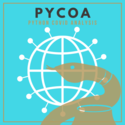

# Démonstration PYCOA pour le Salon de la Culture et des Jeux Mathématiques 2022
[ⓒpycoa.fr](http://pycoa.fr)

Ce notebook a été prévu pour fonctionner avec la version `v2.20` de pycoa.

Installation du package PYCOA 
* en utilisant l'outil standard de python `pip` si nécessaire (par exemple lors de l'utilisation de Google-Colab),
* ou bien définition du chemin nécessaire pour la recherche de l'outil pycoa (par exemple pour une utilisation locale),
* ou bien, dans le cas de l'utilisation dans `binder`, avec l'importation de coabinder

# Importation du package `front`

In [ ]:
# Attention, si les données ne sont pas dans le cache, une connexion internet est nécessaire
import coa.front as cf 

Mots-clefs de pycoa :

*   `where`: sélection de la localisation, localisation qui dépend de la base utilisée
  *   pays, list de pays, région, continent…
  *   département, list de département, régions
*   `which`: donnée sélectionnée dans la base courante
*   `what`: information de type cumul, daily ou weekly
*   `option`: `'nonneg'`, `'nofillnan'`, `'smooth7'`, `'sumall'`
*   `when`: fenêtre de date pour la donnée sélectionnée

Fonctions importante du `front` :
*   `plot`: pour les séries temporelles
*   `hist`: pour les histogrammes, avec pour option
  *   `typeofhist='bycountry'` (par défaut), pour un histogramme à barres horizontales, lieu par lieu
  *   `typeofhist='byvalue'`, pour un histogramme à barres verticales, par valeurs
  *   `typeofhist='pie'`, pour un camembert
*   `map`: pour une représentation sous forme de carte
*   `get`: pour récupérer les données, en vue d'un traitement ultérieur
  

## Exemple de la documentation
On retrouvera les informations importantes sur le [wiki pycoa](https://github.com/coa-project/pycoa/wiki). 

In [ ]:
# JHU utilisé par défaut
cf.plot(option='sumall') # default is 'deaths', for all countries
cf.plot(where='g20') # managing region
cf.map(where='oecd',what='daily',when='01/02/2021',which='confirmed')

# OWID
cf.setwhom('owid') # changing database
cf.hist(which='total_vaccinations') # default is for all countries
cf.hist(which='cur_icu_patients',typeofhist='pie',where='european union')
cf.hist(which='total_people_fully_vaccinated_per_hundred',typeofhist='byvalue',where='asia')

# Santé Publique France database
cf.setwhom('spf') 
cf.map(which='tot_vacc',tile='esri') # Vaccinations, map view optional tile 

 # JHU USA database
cf.setwhom('jhu-usa')
cf.map(visu='folium') # deaths, map view with folium visualization output

## Pour aller un peu plus loin, sur la base d'exemples

In [ ]:
print(cf.listwhich())
print(cf.listwhat())
print(cf.listoption())
print(cf.listwhom(detailed=True))

In [ ]:
cf.setwhom('spf')

In [ ]:
cf.listregion()

In [ ]:
cf.hist(where='ile de france',which='cur_rea')

In [ ]:
cf.plot(where='Métropole',what='daily',which='tot_dc')

In [ ]:
cf.plot(where='Métropole',what='daily',which='tot_dc',option='smooth7') # moyennage sur 7 jours glissants

Avec notre package de gestion de la geographie, on peut faire par exemple : 

In [ ]:
cf.setwhom('jhu')
cf.plot(where='G20',what='daily',which='deaths')

Il est possible d'utiliser l'option `sumall` pour l'Afrique complète entre le 01/05/2020 et le 27/01/2021.

In [ ]:
cf.plot(where='Africa',what='daily',which='deaths',option="sumall",when='01/05/2020:27/01/2021')

Si on se concentre sur la France et l'Espagne…

In [ ]:
cf.plot(where=['France','Spain'],what='daily',which='deaths')

In [ ]:
cf.plot(where=['France','Spain'],what='cumul',which='deaths')

In [ ]:
cf.plot(where=['France','Spain'],what='cumul',which='deaths',option='nonneg')

In [ ]:
# Owid database
cf.setwhom('owid')

In [ ]:
cf.hist(where='Europe',which='total_vaccinations',typeofhist='pie')

In [ ]:
cf.map(where='G7',what='cumul',which='total_vaccinations')

In [ ]:
cf.map(where='G7',what='cumul',which='total_vaccinations',tile='esri')

In [ ]:
# Base de SPF
cf.setwhom('spf')

In [ ]:
cf.hist(where=['Île-de-France','Bretagne',"Provence-Alpes-Côte d'Azur"],what='cumul',which='tot_vacc')
cf.plot(where=['Île-de-France','Bretagne',"Provence-Alpes-Côte d'Azur"],what='cumul',which='tot_vacc')

In [ ]:
# Utilisation de la notation à double crochets
cf.hist(where=[['Île-de-France'],['Bretagne'],["Provence-Alpes-Côte d'Azur"]],what='cumul',which='tot_vacc',option='sumall')
cf.plot(where=[['Île-de-France'],['Bretagne'],["Provence-Alpes-Côte d'Azur"]],what='cumul',which='tot_vacc',option='sumall')

In [ ]:
cf.plot(option='sumall',which='tot_vacc')

## À vous de jouer !